<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/Copy_of_8_1_1_THEORY_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# %matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
!gdown "1Egv9Q7MnDqPHNO25n-bmGUs4qOcgal4b"

hp = pd.read_csv('house-prices.csv')
hp

Downloading...
From: https://drive.google.com/uc?id=1Egv9Q7MnDqPHNO25n-bmGUs4qOcgal4b
To: /content/house-prices.csv
100% 3.87k/3.87k [00:00<00:00, 9.63MB/s]


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


Text(0.5, 1.0, 'Price vs Square Feet')

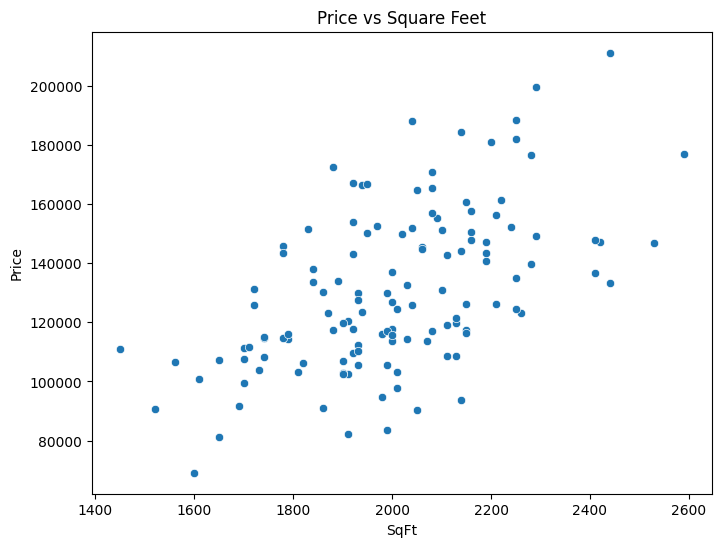

In [ ]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

## First step: Create train/test splits

- Train set is to fit the model (find the weights)
- Test set, after the model is trained, evaluate the model on data never seen before


In [ ]:
# Features -> X
X = hp["SqFt"]

# Target labels -> y
y = hp["Price"]

X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.2,
  random_state=3, # we set a specific random_state so that we get the same ("random") partitioning each time
  shuffle=True    # we set shuffle to True so that the data is shuffled randomly before partitioning
)

X_train[0]
# X_train.iloc[0], y_train.iloc[0]

np.int64(1790)

In [ ]:
X.shape

(128,)

In [ ]:
X_train.shape, X_test.shape

((102,), (26,))

In [ ]:
y_train.shape, y_test.shape

((102,), (26,))

## Create a baseline (naive) model

In [ ]:
class NaiveRegressor():
  """
  This model will compute the median from our
  training dataset and will use that value
  as the predicted value for any given input.

  h(x) = median(train_labels)
  """

  def __init__(self):
    self.w0 = 0
    self.w1 = 0

  def cost(self, X, y):

    # MSE: mean squared error
    diff = (self.predict(X) - y)**2
    m    = len(X)
    diff_sum = sum(diff) / m
    return diff_sum

  def fit(self, X, y):
    self.w0 = np.median(y)

  def predict(self, x):
    return self.w0


- **fit()** -> trains the model
- **predict()** -> uses the trained model to get a prediction
- **transform()** -> uses the trained model to transform data, not used here but common to have it in scalers like MinMaxScaler()

In [ ]:
# Create the regressor model
nv_regressor = NaiveRegressor()

# Calculate cost without training the model
nv_regressor.cost(X=X_train, y=y_train)

17647522254.901962

In [ ]:
# Predict returns 0 because we dind't train the model yet
# Weights are not set
nv_regressor.predict(1000)

0

In [ ]:
# Create and train the model
nv_regressor = NaiveRegressor()
nv_regressor.fit(X=X_train, y=y_train) # <- sets w0 to be the median
nv_regressor.cost(X=X_train, y=y_train)


737499950.9803921

In [ ]:
nv_regressor.predict(250)

np.float64(125950.0)

In [ ]:
nv_regressor.predict(70)

np.float64(125950.0)

In [ ]:
nv_regressor.predict(-100)

np.float64(125950.0)

<Axes: title={'center': 'Price vs Square Feet'}, xlabel='SqFt', ylabel='Price'>

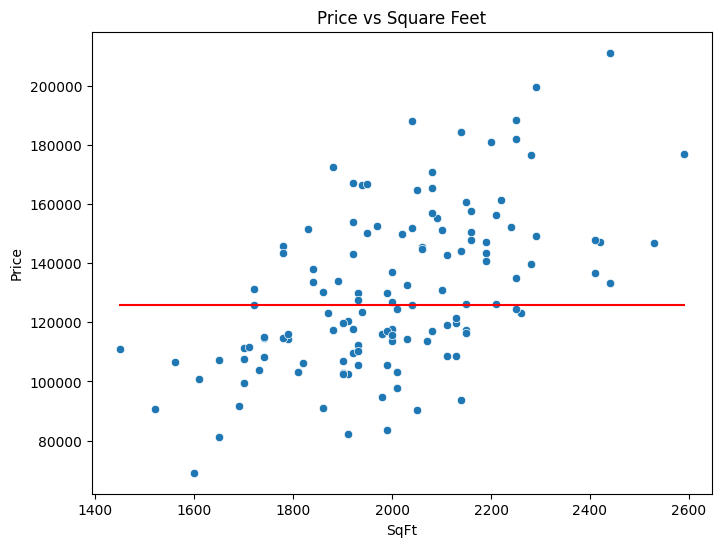

In [ ]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

x1 = hp["SqFt"].min()
x2 = hp["SqFt"].max()
y1 = nv_regressor.predict(x1)
y2 = nv_regressor.predict(x2)
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

In [ ]:
class RandLinearRegressor():
  """
  Linear regression model in which weights are
  chosen by random sampling.
  """

  def __init__(self, max_iter):
    self.w0 = 0
    self.w1 = 0
    self._max_iter = max_iter

  def cost(self, X, y):

    # MSE: mean squared error
    diff = (self.predict(X) - y)**2
    m    = len(X)
    diff_sum = sum(diff) / m
    return diff_sum

  def fit(self, X, y):
    # 1. Iterate over _max_iter
    for i in range(self._max_iter):
      # Get initial cost (MSE)
      initial_cost = self.cost(X, y)

      # Store the previous w0 and w1
      tmp_w0, tmp_w1 = self.w0, self.w1
      # Randomly get a new w0 and w1
      self.w0, self.w1 = np.random.randint(-10000, 10000, 2)

      cost_value = self.cost(X, y)
      if cost_value > initial_cost:
        self.w0, self.w1 = tmp_w0, tmp_w1

  def predict(self, x):
    y = self.w1 * x + self.w0
    return y


In [ ]:
%%time

# Create and train the model
nv_regressor = RandLinearRegressor(max_iter=10000)

nv_regressor.fit(X=X_train, y=y_train)

CPU times: user 8.83 s, sys: 93.4 ms, total: 8.93 s
Wall time: 11.7 s


In [ ]:
nv_regressor.w0, nv_regressor.w1

(np.int64(-2998), np.int64(68))

In [ ]:
nv_regressor.predict(20000)

np.int64(1357002)

<Axes: title={'center': 'Price vs Square Feet'}, xlabel='SqFt', ylabel='Price'>

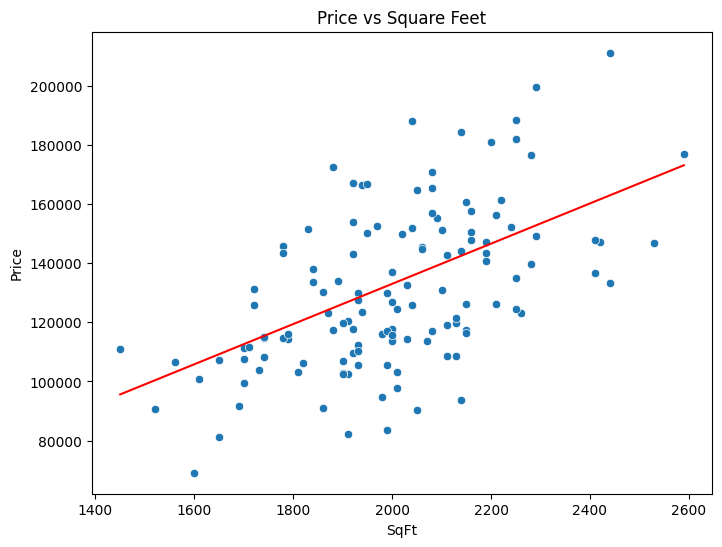

In [ ]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

x1 = hp["SqFt"].min()
x2 = hp["SqFt"].max()
y1 = nv_regressor.predict(x1)
y2 = nv_regressor.predict(x2)
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

In [ ]:
train_cost = nv_regressor.cost(X=X_train, y=y_train)
train_cost


484291491.0588235

In [ ]:
test_cost = nv_regressor.cost(X=X_test, y=y_test)
test_cost

583474164.0

## Train Linear Regression model on data

In [ ]:
lr1 = SGDRegressor()

In [ ]:
# This will fail bacause we didn't train the model yet
# Weights aren't set at this point
# lr1.coef_, lr1.lr1.intercept_

In [ ]:
# Train model and check weights again
lr1 = SGDRegressor(max_iter=1000, verbose=1, random_state=0)

lr1.fit(X_train.values.reshape(-1, 1), y_train)


-- Epoch 1
Norm: 1736066268988.77, NNZs: 1, Bias: 7967050715.141273, T: 102, Avg. loss: 54866743753020524902257642176512.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2067804879197.21, NNZs: 1, Bias: 7884837979.096518, T: 204, Avg. loss: 21982863797212936308129078968320.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1750970747426.40, NNZs: 1, Bias: 2955325347.007013, T: 306, Avg. loss: 18417653450731108226431069454336.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2415122019614.20, NNZs: 1, Bias: 7569231596.980759, T: 408, Avg. loss: 13054065588556412894383366471680.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 477180234885.35, NNZs: 1, Bias: 3249735136.769562, T: 510, Avg. loss: 12050323568856595255322556235776.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1880401689618.20, NNZs: 1, Bias: 3218208058.484243, T: 612, Avg. loss: 12097868665377904087361902346240.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 517839

SGDRegressor(random_state=0, verbose=1)

In [ ]:
lr1.coef_

array([9.72184471e+11])

In [ ]:
lr1.intercept_

array([5.99570304e+09])

### Plot data and trained model

Equation: y = 5995703043.14 + 972184471334.08x1


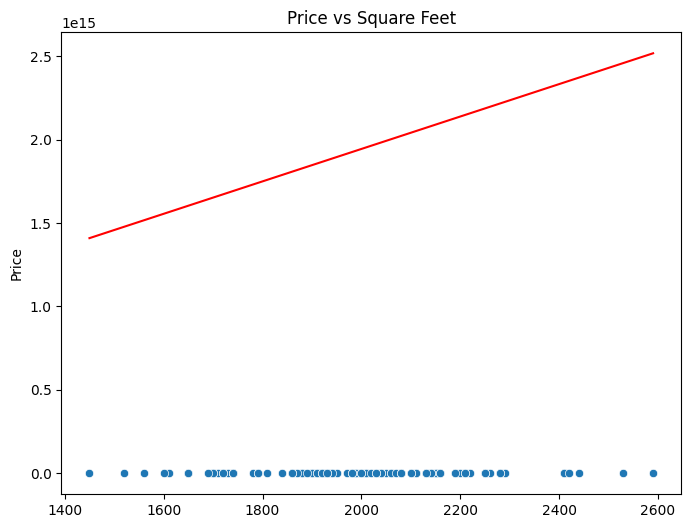

In [ ]:
print(f"Equation: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1")

x1 = X_train.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X_train.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

sns.scatterplot(x=X_train.values, y=y_train).set_title('Price vs Square Feet')
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')
plt.show()

In [ ]:
lr1.predict([[2400]])

array([2.33324873e+15])

## Let's use some Feature Engineering

We will scale our data first in order to help SGD algorithm to converge easier.

In [ ]:
std_scaler = StandardScaler()
# Fit the scaler on train data ONLY!
std_scaler.fit(X_train.values.reshape(-1, 1))
X_train_scaled = std_scaler.transform(X_train.values.reshape(-1, 1))

# Now let's create our model and use the scaled features for training
lr1 = SGDRegressor(verbose=1, random_state=0)
lr1.fit(X_train_scaled, y_train)


-- Epoch 1
Norm: 7012.82, NNZs: 1, Bias: 44971.685169, T: 102, Avg. loss: 5727733004.044065
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9289.76, NNZs: 1, Bias: 66593.372067, T: 204, Avg. loss: 3002704039.292192
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10704.20, NNZs: 1, Bias: 80928.410895, T: 306, Avg. loss: 1835199918.460647
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11745.65, NNZs: 1, Bias: 91231.196525, T: 408, Avg. loss: 1215857345.422857
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 12501.08, NNZs: 1, Bias: 98901.842990, T: 510, Avg. loss: 858233542.784618
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13098.91, NNZs: 1, Bias: 104779.264786, T: 612, Avg. loss: 642429098.762385
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 13557.99, NNZs: 1, Bias: 109366.900975, T: 714, Avg. loss: 507164497.949092
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 13896.58, NNZs: 1, Bias: 113030.665215, T: 816, Avg. loss: 419862102.596673
Total training

SGDRegressor(random_state=0, verbose=1)

Equation: y = 130098.92 + 15555.12x1


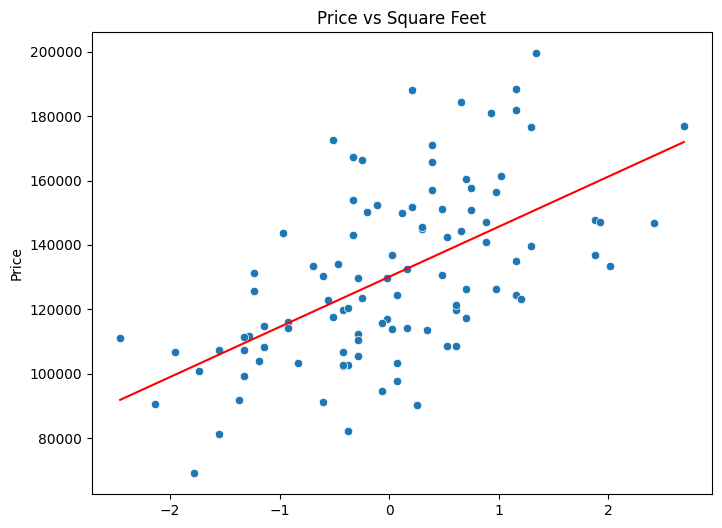

In [ ]:
print(f"Equation: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1")

x1 = X_train_scaled.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X_train_scaled.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

sns.scatterplot(x=X_train_scaled.flatten(), y=y_train).set_title('Price vs Square Feet')
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')
plt.show()

In [ ]:
# Make predictions on train dataset
y_train_pred = lr1.predict(X_train_scaled)
y_train_pred

array([126306.50206224, 150878.08423027, 139645.36095346, 124200.36644784,
       136135.13492945,  91906.287027  , 117179.91439983, 148069.90341107,
       125604.45685744, 138241.27054386, 138241.27054386, 111563.55276142,
       103139.01030381, 141049.45136306, 129816.72808625, 134028.99931505,
       159302.62668789, 109457.41714702, 137539.22533906, 123498.32124304,
       110159.46235182,  99628.78427981, 148069.90341107, 122094.23083344,
       167727.1691455 , 148771.94861587, 137539.22533906,  96820.6034606 ,
       141049.45136306, 128412.63767664, 122094.23083344, 148069.90341107,
       134731.04451985, 141049.45136306, 125604.45685744, 159302.62668789,
       110861.50755662, 121392.18562863, 150176.03902547, 133326.95411025,
       148069.90341107, 143857.63218226, 134731.04451985, 131220.81849585,
       129816.72808625, 123498.32124304, 141751.49656786, 127008.54726704,
       123498.32124304, 123498.32124304, 131220.81849585, 109457.41714702,
       120690.14042383, 1

In [ ]:
# Make predictions on test dataset
X_test_scaled = std_scaler.transform(X_test.values.reshape(-1, 1))
y_test_pred = lr1.predict(X_test_scaled)


## Linear Regression with two features

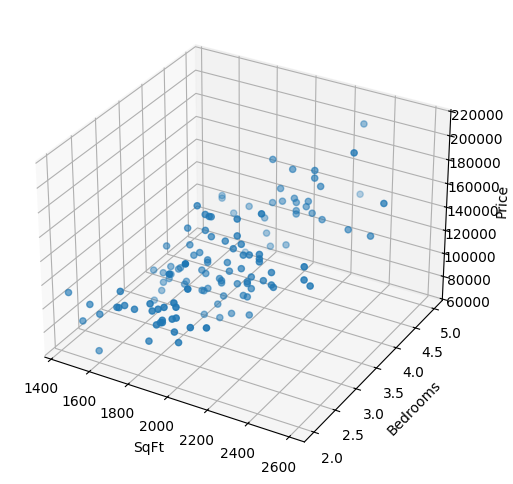

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = hp["SqFt"]
y = hp["Bedrooms"]
z = hp["Price"]

ax.set_xlabel("SqFt")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")

ax.scatter(x, y, z)

plt.show()

In [ ]:
# Training code
lr2 = SGDRegressor(random_state=0)

X = hp[["SqFt", "Bedrooms"]].values
y = hp.Price.values

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

lr2.fit(X_scaled, y)


SGDRegressor(random_state=0)

Equation: y = 130435.57 + 10414.80x1 + 9039.34x2


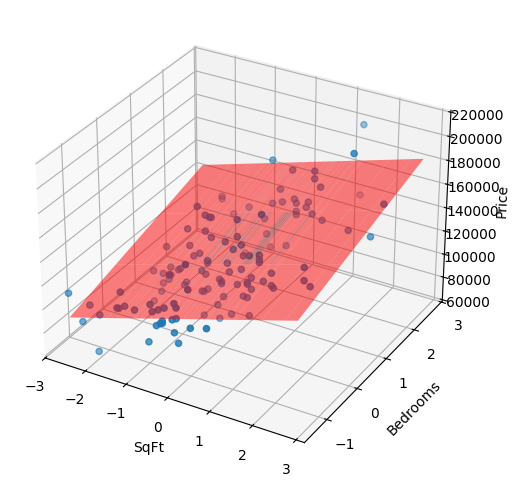

In [ ]:
# Plot code
coefs = lr2.coef_
intercept = lr2.intercept_
num_samples = len(X)

x = X_scaled[:, 0]
y = X_scaled[:, 1]
z = hp.Price.values
xs = np.tile(np.sort(x), (num_samples, 1))
ys = np.tile(np.sort(y), (num_samples, 1)).T
zs = xs*coefs[0] + ys*coefs[1] + intercept
print(f"Equation: y = {intercept[0]:.2f} + {coefs[0]:.2f}x1 + {coefs[1]:.2f}x2")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("SqFt")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")

ax.scatter(x, y, z)
ax.plot_surface(xs,ys,zs, alpha=0.5, color='r')

plt.show()

In [ ]:
y_pred = lr2.predict(X_scaled)


## Regression with Polynomial Features

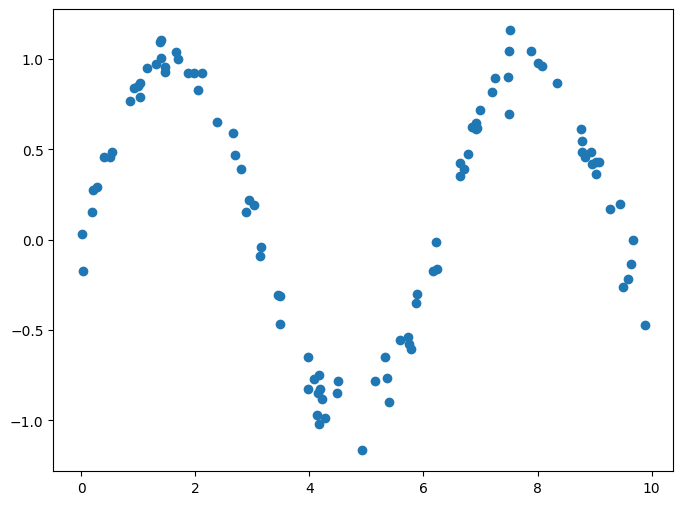

In [ ]:
# Generate a random dataset
rng = np.random.RandomState(1)
num_samples = 100
x = 10 * rng.rand(num_samples)
x.sort()
y = np.sin(x) + 0.1 * rng.randn(num_samples)

plt.scatter(x, y)

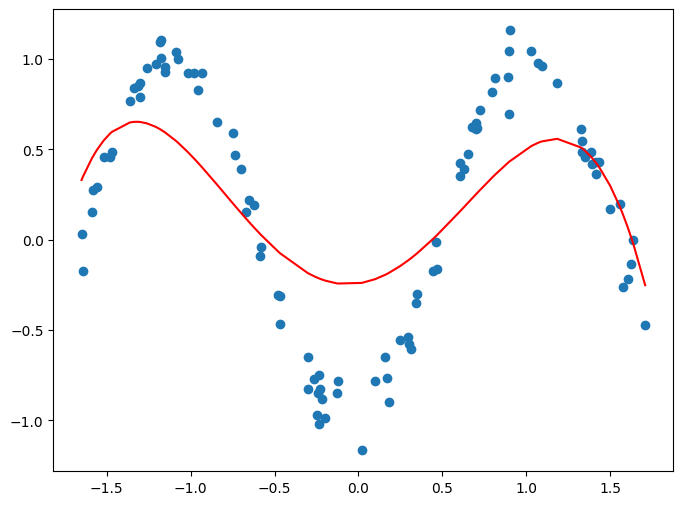

In [ ]:
x_scaled = StandardScaler().fit_transform(x.reshape(-1, 1))

poly_model = make_pipeline(
  PolynomialFeatures(5),
  SGDRegressor(random_state=0)
)
poly_model.fit(x_scaled, y)
yfit = poly_model.predict(x_scaled)

plt.scatter(x_scaled, y)
plt.plot(x_scaled, yfit, color='red')